In [1]:
# Importing Requierd Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from glob import glob # To get name of files in a folder
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

This public dataset was created by the Social Security Administration and contains all names from Social Security card applications for births that occurred in the United States after 1879. 

## Importing Dataset

In [2]:
files = glob('names/yob*')

In [3]:
# finding out the last and the first year of the dataset
fyear = files[0][-8:-4]
lyear = files[-1][-8:-4]
print('First Year: ', fyear)
print('Last Year: ', lyear)

First Year:  1880
Last Year:  2018


## Sample Dataset for Year 1880

In [4]:
df = pd.read_csv(files[0], delimiter=',' , names = ['Names','Gender', 'Count'])
df.head()

,Names,Gender,Count
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


# Total Population Trend
From this dataset we can calculate total births every year and visualize the population trend

In [5]:
# creating a new customized dataframe 
total_pop = pd.DataFrame(columns=['Year','Population'])
total_pop

,Year,Population


In [6]:
for year in range(int(fyear), int(lyear) + 1):
    # updating a dataframe with the columns name 
    temp_df = pd.read_csv(files[year - int(fyear)], delimiter=',' , names = ['Names','Gender', 'Count'])
    # updating our customized dataframe as per our need 
    total_pop = total_pop.append({'Year' : year, 'Population' : temp_df['Count'].sum()}, ignore_index=True)

C:\Users\patel\AppData\Local\Temp\ipykernel_7344\1062798716.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_pop = total_pop.append({'Year' : year, 'Population' : temp_df['Count'].sum()}, ignore_index=True)
C:\Users\patel\AppData\Local\Temp\ipykernel_7344\1062798716.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_pop = total_pop.append({'Year' : year, 'Population' : temp_df['Count'].sum()}, ignore_index=True)
C:\Users\patel\AppData\Local\Temp\ipykernel_7344\1062798716.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_pop = total_pop.append({'Year' : year, 'Population' : temp_df['Count'].sum()}, ignore_index=True)
C:\Users\patel\AppData\Local\Temp\ipykernel_7344\1062798716.py:5: FutureWarning: The 

C:\Users\patel\AppData\Local\Temp\ipykernel_7344\1062798716.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_pop = total_pop.append({'Year' : year, 'Population' : temp_df['Count'].sum()}, ignore_index=True)
C:\Users\patel\AppData\Local\Temp\ipykernel_7344\1062798716.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_pop = total_pop.append({'Year' : year, 'Population' : temp_df['Count'].sum()}, ignore_index=True)
C:\Users\patel\AppData\Local\Temp\ipykernel_7344\1062798716.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_pop = total_pop.append({'Year' : year, 'Population' : temp_df['Count'].sum()}, ignore_index=True)
C:\Users\patel\AppData\Local\Temp\ipykernel_7344\1062798716.py:5: FutureWarning: The 

In [7]:
total_pop

,Year,Population
0,1880,201484
1,1881,192696
2,1882,221533
3,1883,216944
4,1884,243461
...,...,...
134,2014,3698914
135,2015,3691990
136,2016,3657797
137,2017,3561975


Text(0.5, 1.0, 'Total Population Trend')

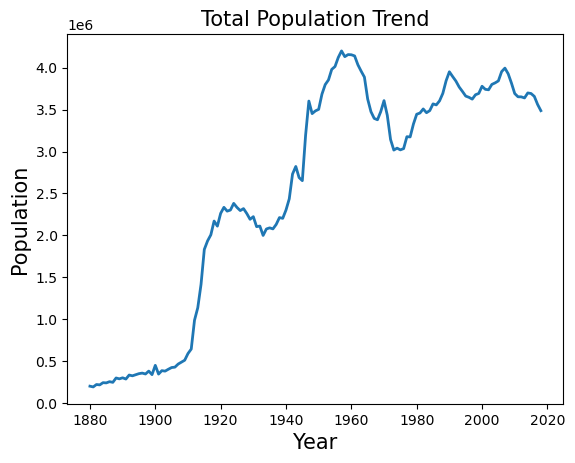

In [8]:
#Plotting the Population Trend
plt.plot(total_pop.Year, total_pop.Population, linewidth=2)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('Total Population Trend', fontsize=15)

# Gender Based Population Trend
Now Suppose, we want to look at the trend of births based on Gender

In [9]:
gender_pop = pd.DataFrame(columns=['Year','Population','Gender'])

In [10]:
for year in range(int(fyear), int(lyear) + 1):
    temp_df = pd.read_csv(files[year - int(fyear)], delimiter=',' , names = ['Names','Gender', 'Count'])
    male = temp_df.groupby(['Gender']).sum('Count').loc['M'].values[0]
    female = temp_df.groupby(['Gender']).sum('Count').loc['F'].values[0]
    gender_pop = gender_pop.append({'Year' : year, 'Population' : female, 'Gender' : 'Female'}, ignore_index=True)
    gender_pop = gender_pop.append({'Year' : year, 'Population' : male, 'Gender' : 'Male'}, ignore_index=True)

gender_pop['Population']=gender_pop['Population'].astype('int')

C:\Users\patel\AppData\Local\Temp\ipykernel_7344\3820130217.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gender_pop = gender_pop.append({'Year' : year, 'Population' : female, 'Gender' : 'Female'}, ignore_index=True)
C:\Users\patel\AppData\Local\Temp\ipykernel_7344\3820130217.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gender_pop = gender_pop.append({'Year' : year, 'Population' : male, 'Gender' : 'Male'}, ignore_index=True)
C:\Users\patel\AppData\Local\Temp\ipykernel_7344\3820130217.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gender_pop = gender_pop.append({'Year' : year, 'Population' : female, 'Gender' : 'Female'}, ignore_index=True)
C:\Users\patel\AppData\Local\Temp\ipykernel_7344\3820130217.py:6: Fu